In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from IPython.display import display_markdown

import cleaning

# Pruning and Resampling

In [2]:
rawData, users = cleaning.loadData("./Data/dataset_mood_smartphone.csv")
timeCorrected = cleaning.remove_useTimeOutliers(rawData)
dailyData  = cleaning.resample_daily(rawData, users)
prunedDaily= cleaning.pruneDays(dailyData,  users, method="longest", baseFrame=rawData)

In [3]:
hourlyData = cleaning.resample_hourly(timeCorrected, users)

In [4]:
pruneHourly = cleaning.pruneDays(hourlyData, users, method="longest", baseFrame=rawData)

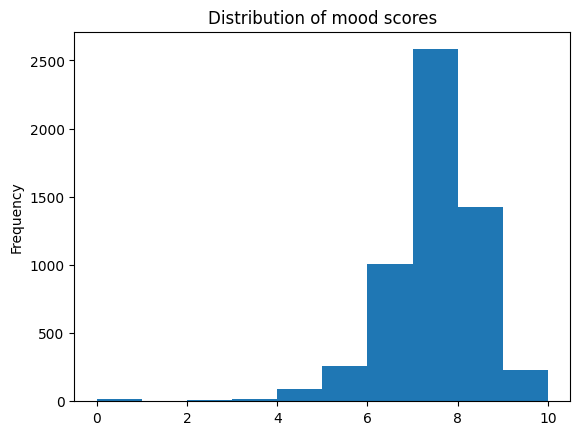

In [5]:
_= rawData["mood"].plot.hist(title="Distribution of mood scores")

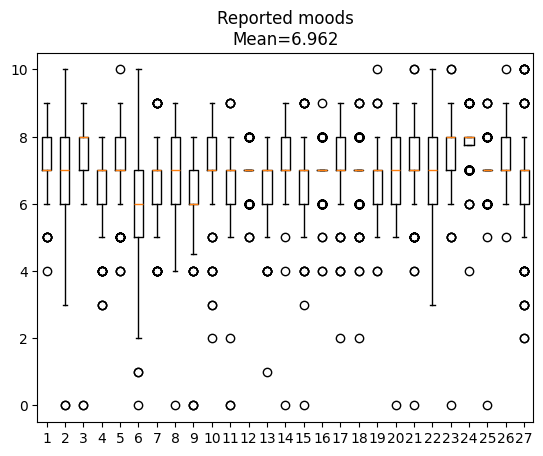

In [6]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

_ = ax0.boxplot([rawData.loc[user]["mood"].loc[rawData.loc[user]["mood"].notna()] for user in users])
_= ax0.set_title(f"Reported moods\nMean={pruneHourly["mood"].mean():.3f}")

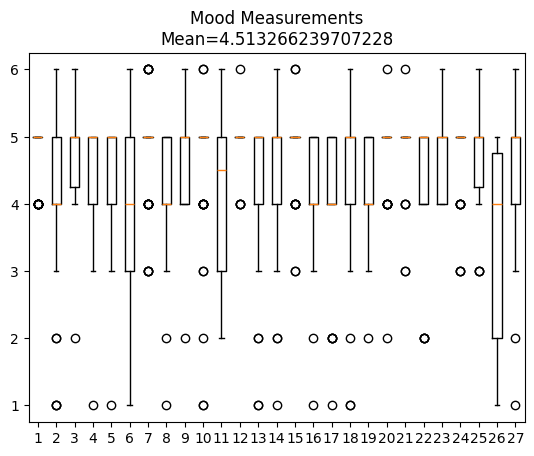

In [27]:
Daily_measurements = pd.concat([rawData.loc[user].resample("1d").count() for user in users], keys=users)
Daily_measurements  = cleaning.pruneDays(Daily_measurements, users, baseFrame=rawData)

fig, ax1 = plt.subplots()
uIds = [user for user in users]

_ = ax1.boxplot([Daily_measurements.loc[user]["mood"] for user in users])
_= ax1.set_title(f"Mood Measurements\nMean={Daily_measurements["mood"].mean()}")


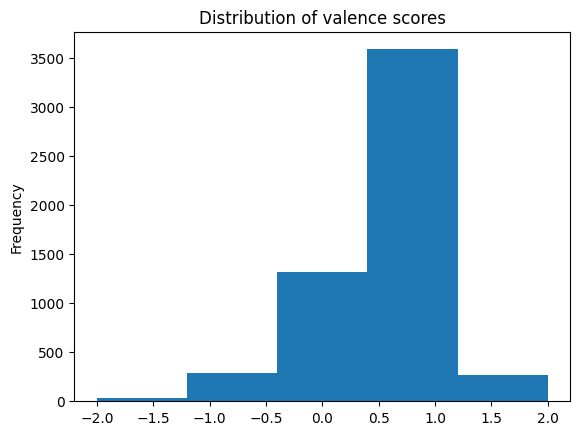

In [7]:
_= rawData["circumplex.valence"].plot.hist(bins = 5, title="Distribution of valence scores")

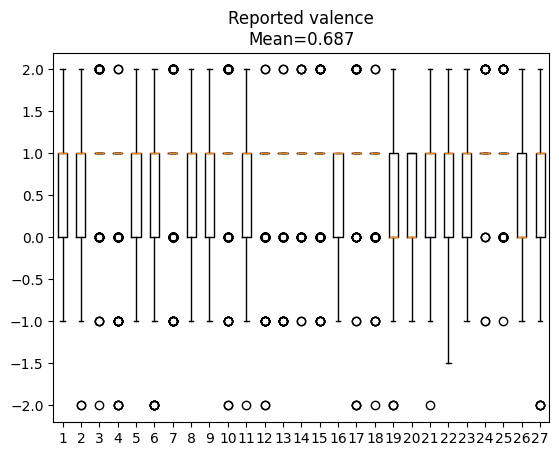

In [21]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]
stat = "circumplex.valence"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Reported valence\nMean={rawData[stat].mean():.3f}")

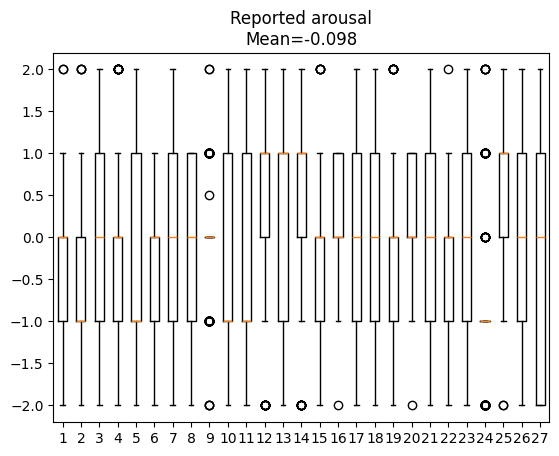

In [20]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

stat = "circumplex.arousal"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Reported arousal\nMean={rawData[stat].mean():.3f}")

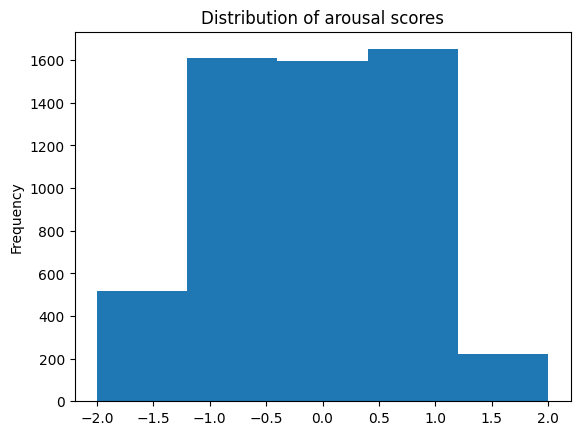

In [26]:
_= rawData["circumplex.arousal"].plot.hist(bins=5, title="Distribution of arousal scores")

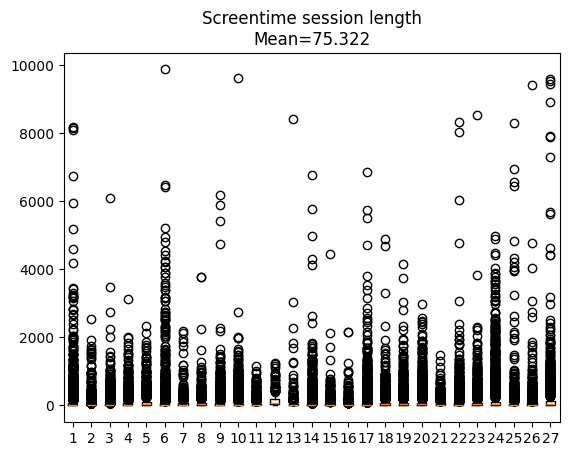

In [29]:
fig, ax0 = plt.subplots()
uIds = [user for user in users]

stat = "screen"
_ = ax0.boxplot([rawData.loc[user][stat].loc[rawData.loc[user][stat].notna()] for user in users])
_= ax0.set_title(f"Screentime session length\nMean={rawData[stat].mean():.3f}")

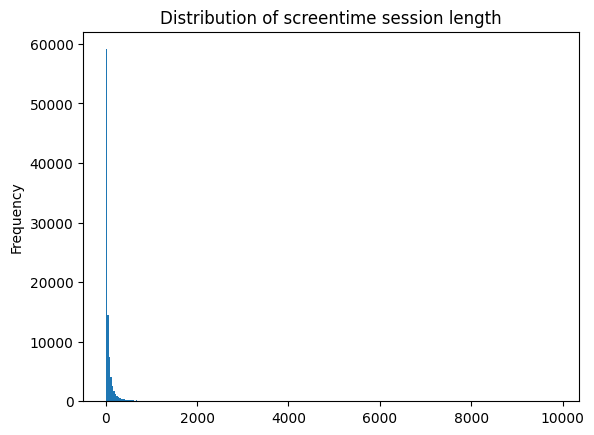

In [35]:
_= rawData["screen"].plot.hist(bins = 300, title="Distribution of screentime session length")

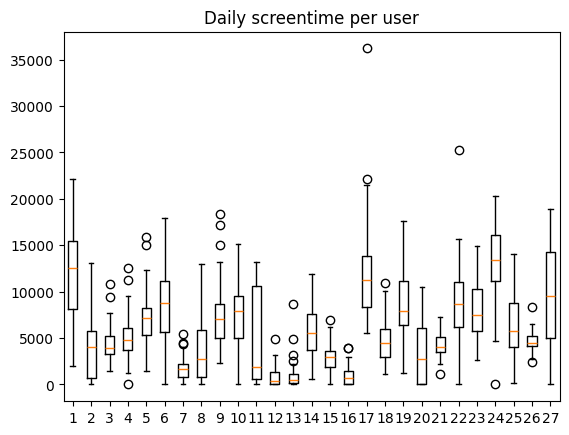

In [12]:
fig, ax1 = plt.subplots()
uIds = [user for user in users]
_ = ax1.boxplot([prunedDaily.loc[user]["screen"] for user in users])
_= ax1.set_title("Daily screentime per user")

<Axes: title={'center': 'Daily screentime distribution'}, ylabel='Frequency'>

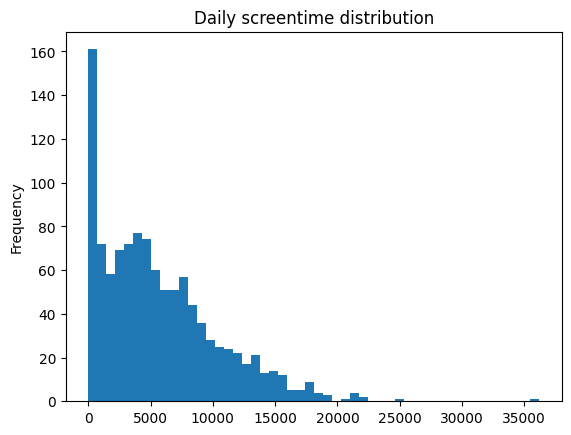

In [37]:
prunedDaily["screen"].plot.hist(bins=50, title="Daily screentime distribution")

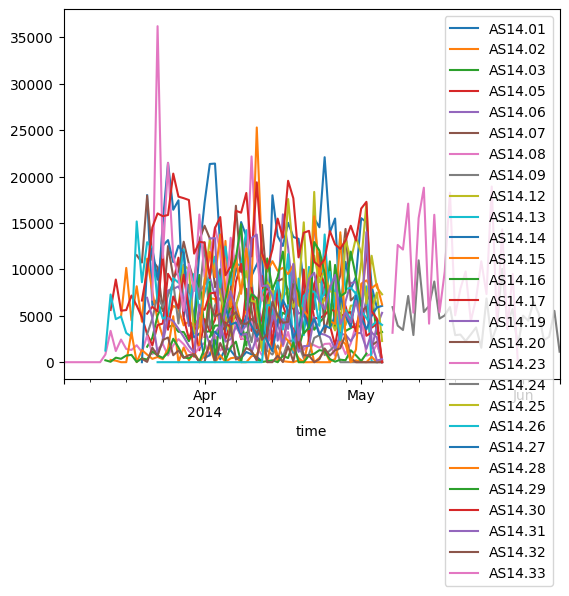

In [15]:

fig, ax = plt.subplots()
for user in users:
    prunedDaily.loc[user].plot.line(y = "screen", ax=ax, label=user)

<Axes: ylabel='Frequency'>

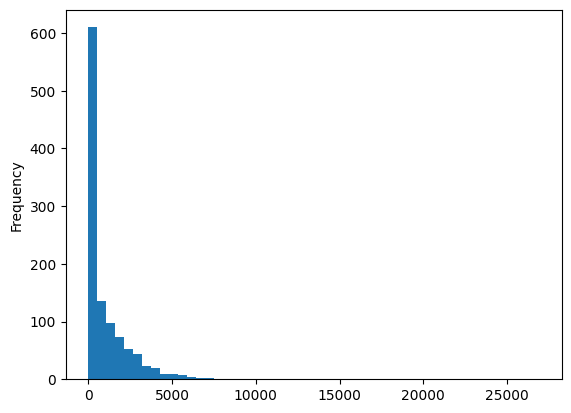

In [16]:
prunedDaily["appCat.social"].plot.hist(bins=50)